# Keras tutorial - the Happy House


Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. Being able to go from idea to result with the least possible delay is key to finding good models. However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that we can implement in TensorFlow but not (without more difficulty) in Keras. That being said, Keras will work fine for many common models. 

In this exercise, I'll work on the "Happy House" problem, which will be explained below. 

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

/Users/nadine/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1 - The Happy House Problem

"For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

<img src="images/happy-house.jpg" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **the Happy House**</center></caption>


As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy. 

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled." 

<img src="images/house-members.png" style="width:550px;height:250px;">


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

It is now time to solve the "Happy" Challenge.

## 2 - Building a model in Keras


! Keras uses a different convention with variable names than we've previously used with numpy and TensorFlow. In particular, rather than creating and assigning a new variable on each step of forward propagation such as `X`, `Z1`, `A1`, `Z2`, `A2`, etc. for the computations for the different layers, in Keras code each line above just reassigns `X` to a new value using `X = ...`. In other words, during each step of forward propagation, we are just writing the latest value in the commputation into the same variable `X`. The only exception was `X_input`, which we kept separate and did not overwrite, since we needed it at the end to create the Keras model instance (`model = Model(inputs = X_input, ...)` above). 


In [3]:
#HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """

    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates Keras model instance, I'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

I have now built a function to describe my model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

!! [Keras documentation](https://keras.io/models/model/).


In [4]:
#1
happyModel = HappyModel(X_train.shape[1:])

In [5]:
#2
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [6]:
#3
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 9s 16ms/step - loss: 3.1431 - acc: 0.5217
Epoch 2/40
600/600 [==============================] - 11s 18ms/step - loss: 0.6923 - acc: 0.7800
Epoch 3/40
600/600 [==============================] - 9s 15ms/step - loss: 0.3575 - acc: 0.8433
Epoch 4/40
600/600 [==============================] - 9s 14ms/step - loss: 0.2123 - acc: 0.9217
Epoch 5/40
600/600 [==============================] - 9s 15ms/step - loss: 0.1602 - acc: 0.9317
Epoch 6/40
600/600 [==============================] - 9s 14ms/step - loss: 0.1640 - acc: 0.9383
Epoch 7/40
600/600 [==============================] - 9s 14ms/step - loss: 0.1156 - acc: 0.9633
Epoch 8/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0904 - acc: 0.9833
Epoch 9/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0833 - acc: 0.9733
Epoch 10/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0763 - acc: 0.9833
Epoch 11/40
600/600 [================

In [ ]:
#4
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Some ways to achieve good accuracy (let's say more than 80%):

- using blocks of CONV->BATCHNORM->RELU such as:
```python
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
```
until height and width dimensions are quite low and the number of channels quite large (≈32 for example). We are encoding useful information in a volume with a lot of channels. We can then flatten the volume and use a fully-connected layer.
- We can use MAXPOOL after such blocks. It will help us lower the dimension in height and width.
- Change the optimizer. I find Adam works well. 
- If the model is struggling to run and there are memory issues, lower the batch_size (12 is usually a good compromise)
- Run on more epochs, until seeing the train accuracy plateauing. 


## 5 - Other useful functions in Keras 

- `model.summary()`: prints the details of the layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots the graph in a nice layout


In [8]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

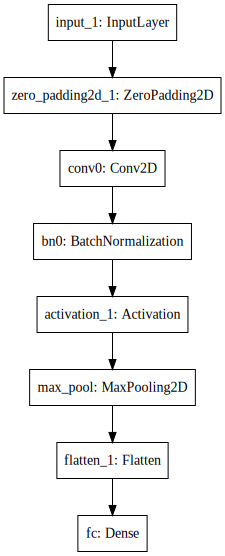

In [9]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))